In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 20222703 Causes Of Death Clean Output V2.0.csv to 20222703 Causes Of Death Clean Output V2.0.csv


In [ ]:
import pandas as pd

# имя загруженного файла
file_name = "20222703 Causes Of Death Clean Output V2.0.csv"

# чтения файла CSV
df = pd.read_csv(file_name)

# первые несколько строк данных
print(df.head())

In [ ]:
df

Causes name  \
0                                         Meningitis   
1                                          Neoplasms   
2                     Fire, heat, and hot substances   
3                                            Malaria   
4                                           Drowning   
...                                              ...   
201757                            Digestive diseases   
201758                               Acute hepatitis   
201759       Alzheimer's disease and other dementias   
201760                           Parkinson's disease   
201761  Number of executions (Amnesty International)   

                                  Causes Full Description  Death Numbers  \
0       Deaths - Meningitis - Sex: Both - Age: All Age...         2933.0   
1       Deaths - Neoplasms - Sex: Both - Age: All Ages...        15925.0   
2       Deaths - Fire, heat, and hot substances - Sex:...          481.0   
3       Deaths - Malaria - Sex: Both - Age: All Ages (...          393.0   
4       Deaths - Drowning - Sex: Both - Age: All Ages ...         2127.0   
...                                                   ...            ...   
201757  Deaths - Digestive diseases - Sex: Both - Age:...         4437.0   
201758  Deaths - Acute hepatitis - Sex: Both - Age: Al...          136.0   
201759  Deaths - Alzheimer's disease and other dementi...          812.0   
201760  Deaths - Parkinson's disease - Sex: Both - Age...          232.0   
201761  Deaths - Number of executions (Amnesty Interna...            NaN   

             Entity Code  Year  
0       Afghanistan  AFG  2007  
1       Afghanistan  AFG  2007  
2       Afghanistan  AFG  2007  
3       Afghanistan  AFG  2007  
4       Afghanistan  AFG  2007  
...             ...  ...   ...  
201757     Zimbabwe  ZWE  2019  
201758     Zimbabwe  ZWE  2019  
201759     Zimbabwe  ZWE  2019  
201760     Zimbabwe  ZWE  2019  
201761     Zimbabwe  ZWE  2019  

[201762 rows x 6 columns]

In [ ]:
top_10_causes = df["Causes Full Description"].value_counts().head(10)
print(top_10_causes)


In [ ]:
rarest_causes = df["Causes Full Description"].value_counts().tail(20)
print(rarest_causes)


In [ ]:
import matplotlib.pyplot as plt

rarest_causes = df["Causes Full Description"].value_counts().tail(10)

plt.figure(figsize=(10, 6))
plt.barh(rarest_causes.index, rarest_causes.values, color='skyblue')
plt.xlabel('Количество случаев')
plt.ylabel('Причина смерти')
plt.title('Топ-10 самых редких причин смерти')
plt.gca().invert_yaxis()  # Переверните ось y для вывода наиболее редких причин сверху
plt.show()


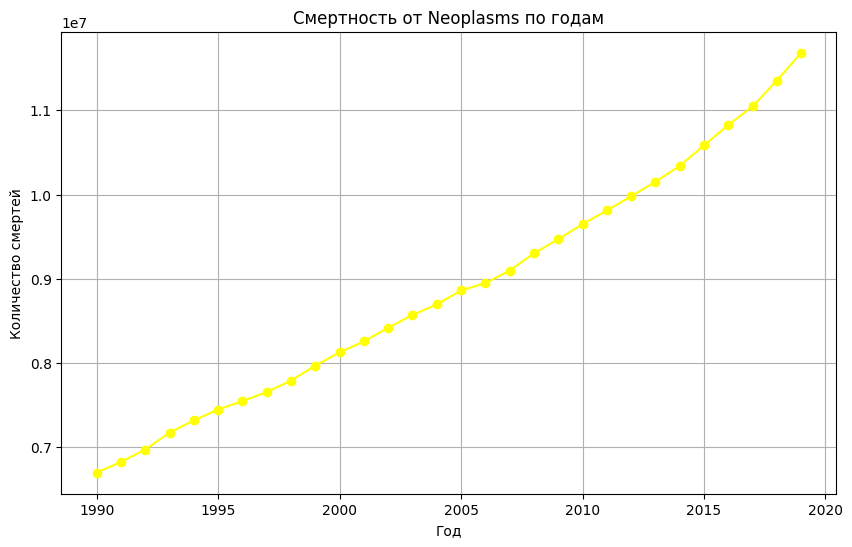

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cause_of_death = "Neoplasms"

selected_cause_data = df[df["Causes name"] == cause_of_death]

yearly_death_counts = selected_cause_data.groupby("Year")["Death Numbers"].sum()

plt.figure(figsize=(10, 6))
plt.plot(yearly_death_counts.index, yearly_death_counts.values, marker='o', linestyle='-', color='yellow')
plt.title(f"Смертность от {cause_of_death} по годам")
plt.xlabel("Год")
plt.ylabel("Количество смертей")
plt.grid(True)
plt.show()



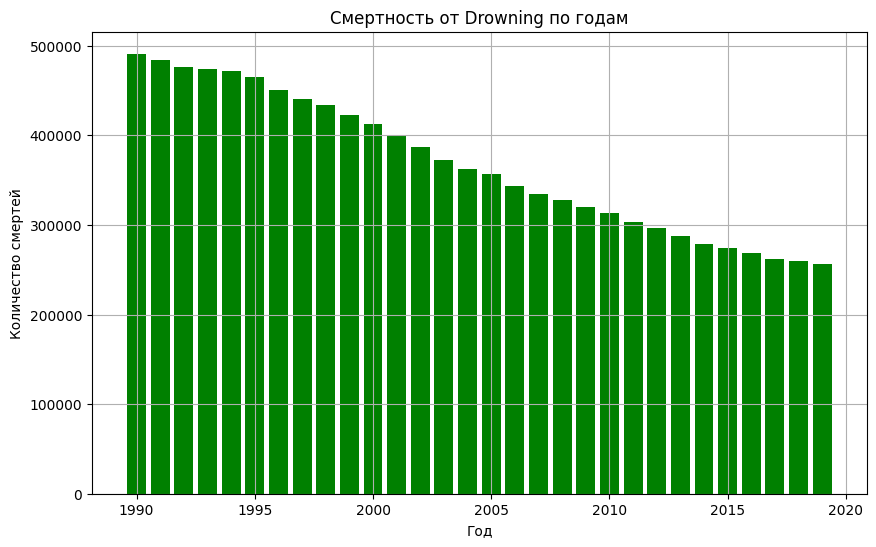

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cause_of_death = "Drowning"

selected_cause_data = df[df["Causes name"] == cause_of_death]

yearly_death_counts = selected_cause_data.groupby("Year")["Death Numbers"].sum()

plt.figure(figsize=(10, 6))
plt.bar(yearly_death_counts.index, yearly_death_counts.values, color='green')
plt.title(f"Смертность от {cause_of_death} по годам")
plt.xlabel("Год")
plt.ylabel("Количество смертей")
plt.grid(True)
plt.show()


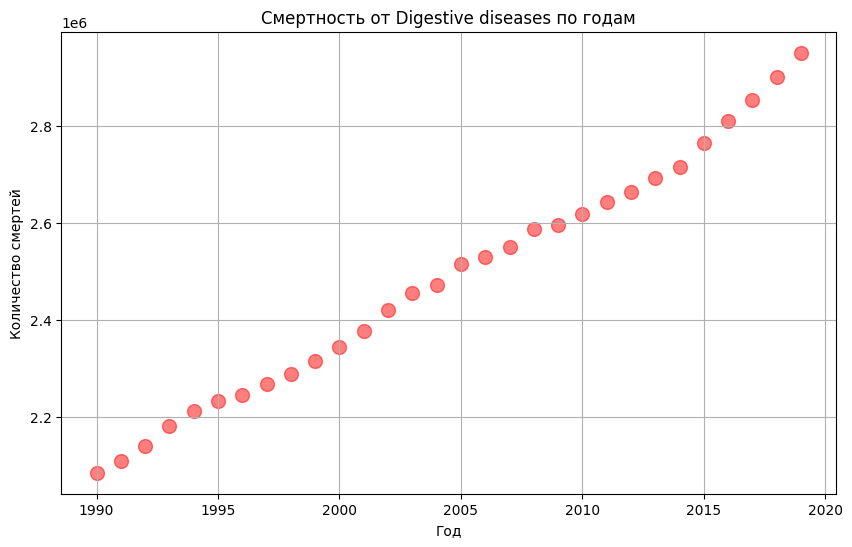

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cause_of_death = "Digestive diseases"

selected_cause_data = df[df["Causes name"] == cause_of_death]

yearly_death_counts = selected_cause_data.groupby("Year")["Death Numbers"].sum()

plt.figure(figsize=(10, 6))
plt.scatter(yearly_death_counts.index, yearly_death_counts.values, color='red', s=100, alpha=0.5)
plt.title(f"Смертность от {cause_of_death} по годам")
plt.xlabel("Год")
plt.ylabel("Количество смертей")
plt.grid(True)
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving custom.geo.json to custom.geo.json


In [ ]:
import geopandas as gpd

# Загрузка географических данных
gdf = gpd.read_file("custom.geo.json")

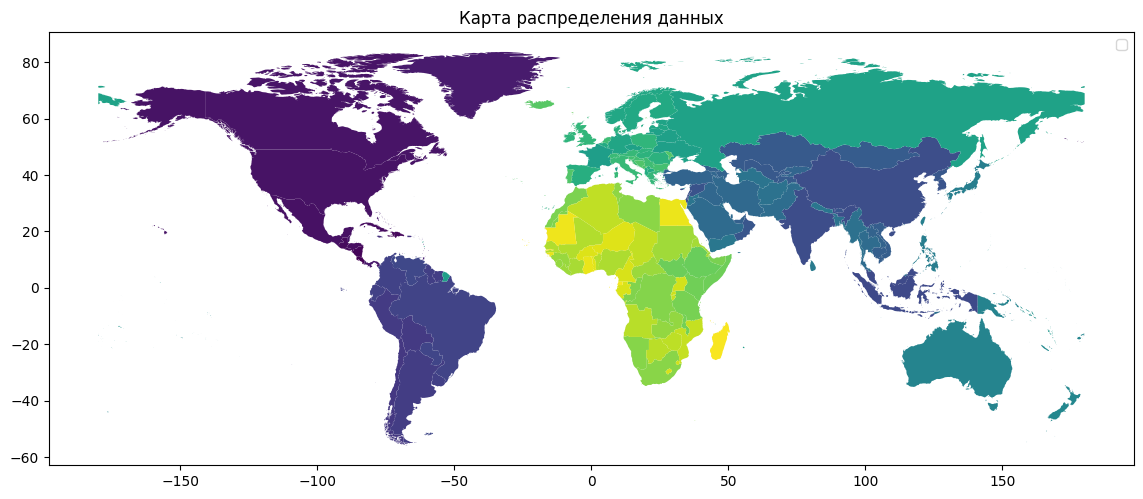

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(14, 10))

gdf.plot(ax=ax, cmap='viridis', legend=False)

ax.set_title("Карта распределения данных")

ax.legend()

plt.show()


In [ ]:
import folium
import pandas as pd
import random

m = folium.Map(location=[0, 0], zoom_start=2)

geo_json = "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json"

folium.GeoJson(geo_json).add_to(m)

data = pd.DataFrame({
    "Country": ["USA", "China", "Russia", "Brazil", "India"],
    "Cases": [5000000, 3000000, 1500000, 2000000, 4000000],
    "Deaths": [100000, 50000, 30000, 80000, 90000],
})

data["Latitude"] = [37.0902, 35.8617, 61.5240, -14.2350, 20.5937]  # Широта страны
data["Longitude"] = [-95.7129, 104.1954, 105.3188, -51.9253, 78.9629]  # Долгота страны

for idx, row in data.iterrows():
    country_name = row["Country"]
    cases = row["Cases"]
    deaths = row["Deaths"]

    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=f"Country: {country_name}<br>Cases: {cases}<br>Deaths: {deaths}",
    ).add_to(m)

m.save("world_map_with_data.html")  # Сохраняет карту в HTML-файле
m